In [1]:
import pandas as pd
import numpy as np

In [8]:
train_data=pd.read_excel('twitter_training.xlsx')
test_data=pd.read_excel('twitter_validation.csv.xlsx')

In [9]:
train_data

,id,Game,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [7]:
test_data

,ID,Brand/Game,Sentiment,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâ€™s time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


# EDA

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   Game       74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [11]:
train_data.shape

(74682, 4)

In [12]:
train_data['Game'].value_counts()

Game
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)          

In [13]:
train_data.isnull().sum()

id             0
Game           0
Sentiment      0
Text         686
dtype: int64

# Duplicate values 

In [15]:
train_data.duplicated().sum()

2701

In [17]:
# Dropping Duplicates
train_data.drop_duplicates(inplace=True)

In [18]:
#  Number of Unique Values
train_data.nunique()

id           12447
Game            32
Sentiment        4
Text         69489
dtype: int64

In [20]:
for i in range(5):
    print(f"{i+1}: {train_data['Text'][i]}   ->   {train_data['Sentiment'][i]}")

1: im getting on borderlands and i will murder you all ,   ->   Positive
2: I am coming to the borders and I will kill you all,   ->   Positive
3: im getting on borderlands and i will kill you all,   ->   Positive
4: im coming on borderlands and i will murder you all,   ->   Positive
5: im getting on borderlands 2 and i will murder you me all,   ->   Positive


# Sentiment Analysis

In [21]:
train_data['Sentiment'].value_counts()

Sentiment
Negative      21787
Positive      19811
Neutral       17799
Irrelevant    12584
Name: count, dtype: int64

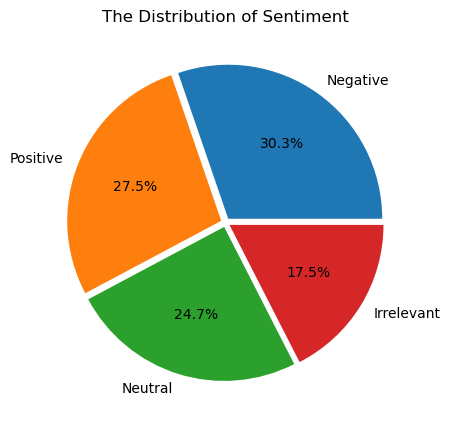

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
plt.pie(train_data['Sentiment'].value_counts().values,
        labels=train_data['Sentiment'].value_counts().index, 
                autopct='%.1f%%', explode=[0.03, 0.03,0.03,0.03])
plt.title('The Distribution of Sentiment')
plt.show()
    

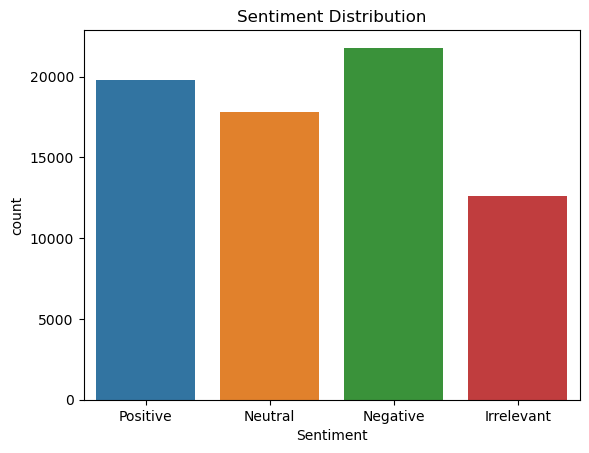

In [27]:
sns.countplot(x='Sentiment', data=train_data)
plt.title('Sentiment Distribution')
plt.show()

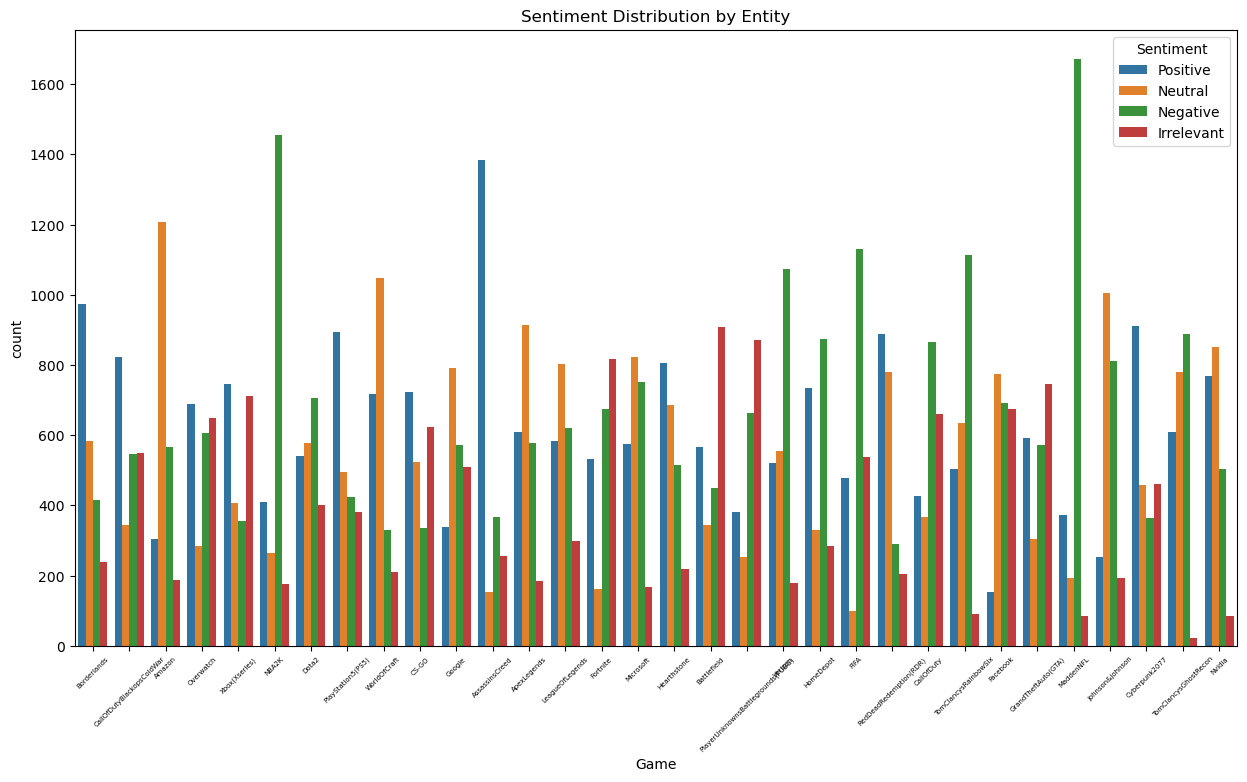

In [29]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Game', hue='Sentiment', data=train_data)
plt.title('Sentiment Distribution by Entity')
plt.xticks(rotation=45, fontsize=5)
plt.show()

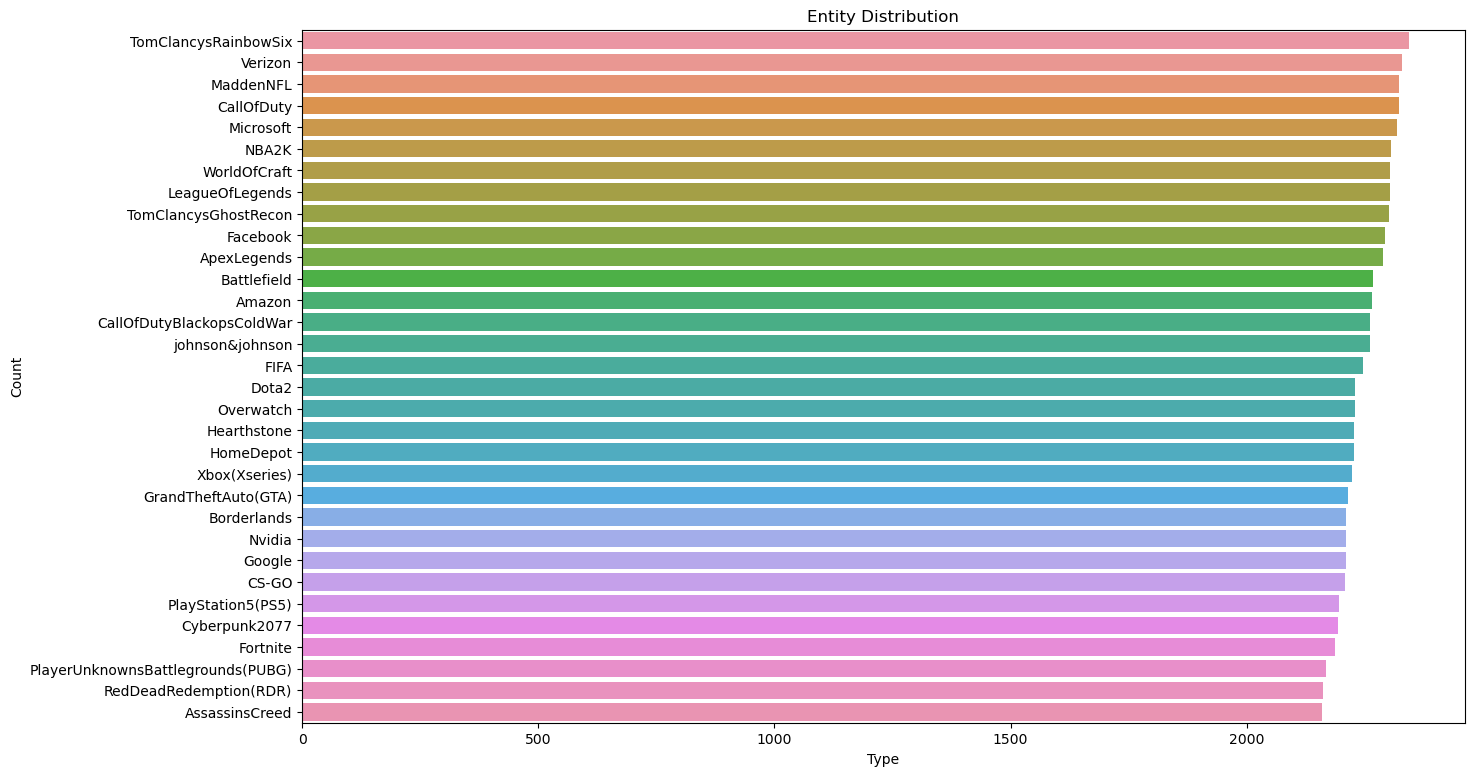

In [30]:
plt.figure(figsize=(15,9))
sns.barplot(x=train_data['Game'].value_counts().values,y=train_data['Game'].value_counts().index)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Entity Distribution')
plt.show()

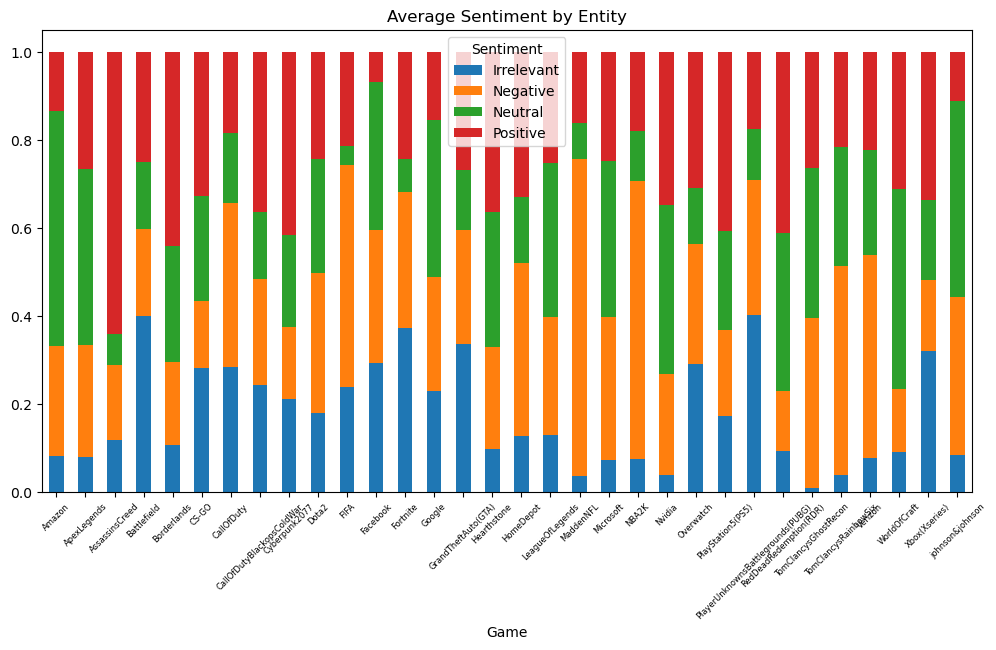

In [31]:
average_sentiment_by_entity = train_data.groupby('Game')['Sentiment'].value_counts(normalize=True).unstack()
average_sentiment_by_entity.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Sentiment by Entity')
plt.xticks(rotation=45, fontsize=6)
plt.show()

# Word Cloud

In [32]:
import nltk
import re
stemmer = nltk.SnowballStemmer("english")
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\MY
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [36]:
train_data["Text"] = train_data["Text"].apply(clean)

In [37]:
train_data.head()

,id,Game,Sentiment,Text,text
0,2401,Borderlands,Positive,im get borderland murder,im get borderland murder
1,2401,Borderlands,Positive,come border kill,come border kill
2,2401,Borderlands,Positive,im get borderland kill,im get borderland kill
3,2401,Borderlands,Positive,im come borderland murder,im come borderland murder
4,2401,Borderlands,Positive,im get borderland murder,im get borderland murder


In [38]:
train_data.drop(columns='text')

,id,Game,Sentiment,Text
0,2401,Borderlands,Positive,im get borderland murder
1,2401,Borderlands,Positive,come border kill
2,2401,Borderlands,Positive,im get borderland kill
3,2401,Borderlands,Positive,im come borderland murder
4,2401,Borderlands,Positive,im get borderland murder
...,...,...,...,...
74677,9200,Nvidia,Positive,realiz window partit mac like year behind nvi...
74678,9200,Nvidia,Positive,realiz mac window partit year behind nvidia d...
74679,9200,Nvidia,Positive,realiz window partit mac year behind nvidia d...
74680,9200,Nvidia,Positive,realiz window partit mac like year behind nvi...


In [39]:
!pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Positive Sentiment Word Cloud:

In [40]:
from PIL import Image, ImageDraw, ImageFont

In [42]:
from wordcloud import WordCloud,STOPWORDS
wc = WordCloud(width=800,height=500,min_font_size=10,background_color='white')

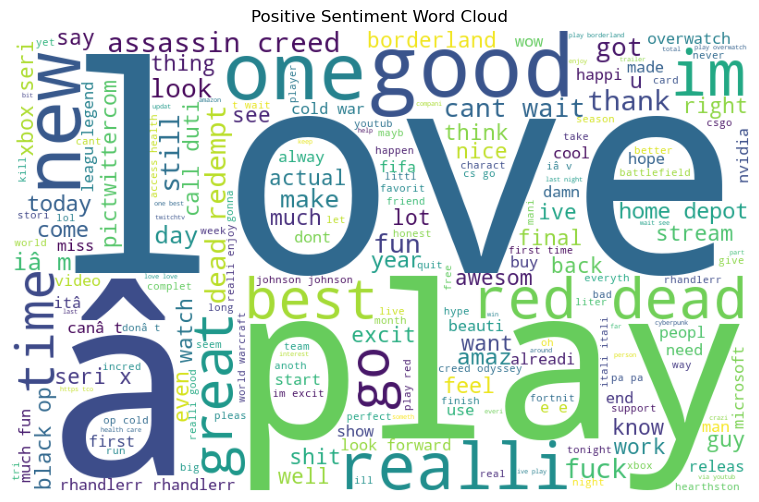

In [51]:
positive_data = train_data[train_data['Sentiment'] == 'Positive']['Text'].str.cat(sep=" ")

# Exclude the word "game" from the text data
positive_data = positive_data.replace("game", "")
if positive_data:
    wc = WordCloud(width=800, height=500, background_color='white').generate(positive_data)
    plt.figure(figsize=(12, 6))
    plt.title('Positive Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for positive sentiment.")

# Negative Sentiment Word Cloud:

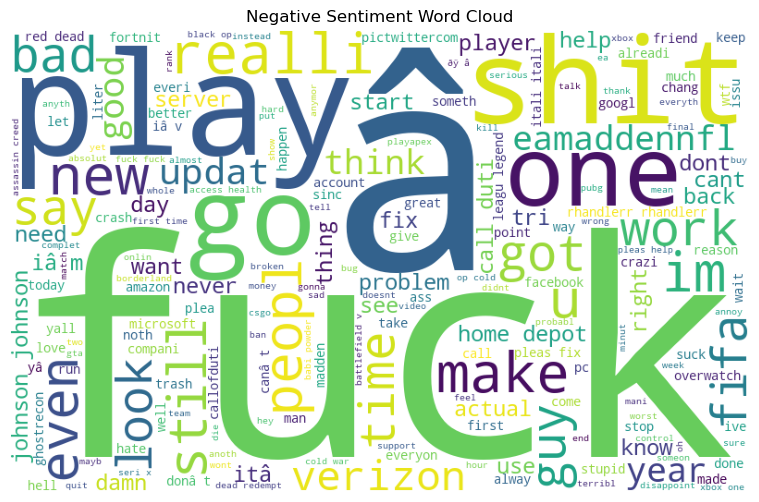

In [50]:
negative_data =  train_data[train_data['Sentiment'] == 'Negative']['Text'].str.cat(sep=" ")

# Exclude the word "game" from the text data
negative_data = negative_data.replace("game", "")
if negative_data.strip():
    wc = WordCloud(width=800, height=500, background_color='white').generate(negative_data)
    plt.figure(figsize=(12, 6))
    plt.title('Negative Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for negative sentiment.")

# Neutral Sentiment Word Cloud:

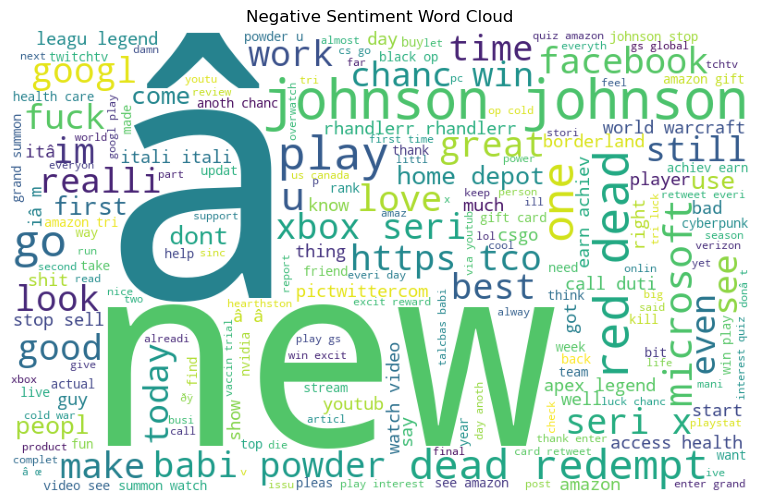

In [49]:
neutral_data = train_data[train_data['Sentiment']== 'Neutral']['Text'].str.cat(sep=" ")

# Exclude the word "game" from the text data
neutral_data = neutral_data.replace("game", "")
if neutral_data.strip():
    wc = WordCloud(width=800, height=500, background_color='white').generate(neutral_data)
    plt.figure(figsize=(12, 6))
    plt.title('Negative Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for neutral sentiment.")

# Irrelevant Sentiment Word Cloud:

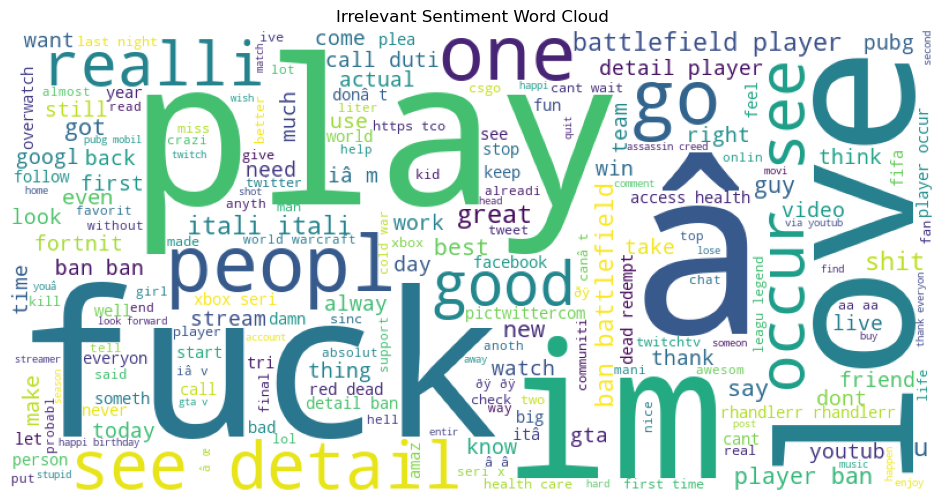

In [48]:
irrelevant_data =  train_data[train_data['Sentiment'] == 'Irrelevant']['Text'].str.cat(sep=" ")

irrelevant_data = irrelevant_data.replace("game", "")

if irrelevant_data.strip():
    wc = WordCloud(width=800, height=400, background_color='white').generate(irrelevant_data)
    plt.figure(figsize=(12, 6))
    plt.title('Irrelevant Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for irrelevant sentiment.")